### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# What are the types of all columns here
column_data_types = data.dtypes
print(column_data_types)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


2. Investigate the dataset for missing or problematic data.

In [5]:
# Checking for null values and how many per column
null_values = data.isnull().sum()
print(null_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [6]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

In [7]:
# Seems like age column is object instead of int which doesn't make sense for what it's measuring

# Convert the 'age' column from string to integer
# If ‘coerce’, then invalid parsing will be set as NaN.
# From documentation: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

data['age'] = pd.to_numeric(data['age'], errors='coerce').astype('Int64')

# Check the conversion result
data['age'].dtypes, data['age'].head()

(Int64Dtype(),
 0    21
 1    21
 2    21
 3    21
 4    21
 Name: age, dtype: Int64)

In [8]:
# Replace any NaN values with the mean age of the dataset

mean_age = int(data['age'].mean())
data['age'] = data['age'].fillna(mean_age)

#check null count should be 0 now
data['age'].isnull().sum()

0

In [9]:
# Same thing for temperature, object -> int

# Calculate the mean age and fill NaN values with the mean

# Convert the 'age' column from string to integer
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce').astype('Int64')

# Check the conversion result
data['temperature'].dtypes, data['temperature'].head()


(Int64Dtype(),
 0    55
 1    80
 2    80
 3    80
 4    80
 Name: temperature, dtype: Int64)

In [10]:
mean_age = data['temperature'].mean()
data['temperature'] = data['temperature'].fillna(mean_age)

# Check if NaN values are handled
data['temperature'].isnull().sum()

0

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
data = data.drop_duplicates()

4. What proportion of the total observations chose to accept the coupon?



In [58]:
accepted_coupon = data['Y'].sum() / (len(data))
print('Proportion of the total observations that chose to accept the coupon: ' + '{:.2%}'.format(accepted_coupon))

Proportion of the total observations that chose to accept the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

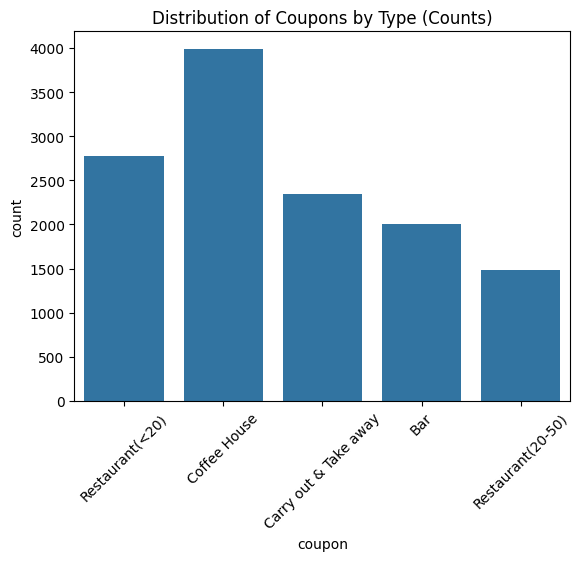

In [61]:
#visualizing by total counts
plt.title('Distribution of Coupons by Type (Counts)')
plt.xticks(rotation=45)

sns.countplot(data=data, x='coupon')

plt.show()

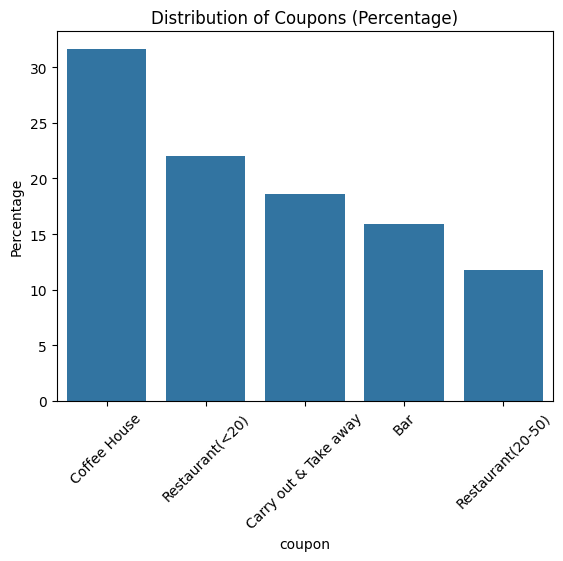

In [14]:
# same as above except in % relative to total

coupon_counts = data['coupon'].value_counts(normalize=True) * 100

sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.title('Distribution of Coupons (Percentage)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram with KDE')

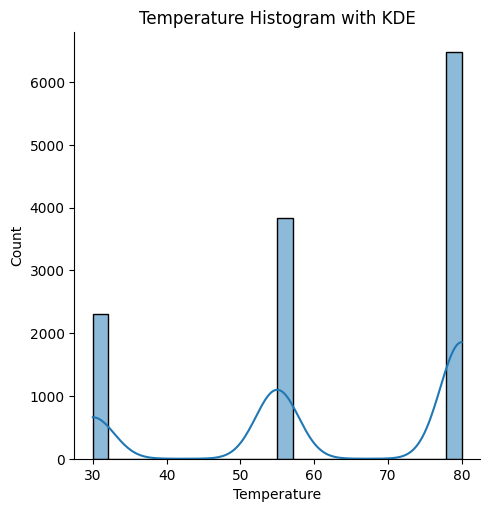

In [15]:
# to better see the overall "shape" of the data, try kde
sns.displot(data['temperature'], kde=True)
plt.xlabel('Temperature')
plt.title('Temperature Histogram with KDE')

Text(0.5, 1.0, 'Temperature Histogram')

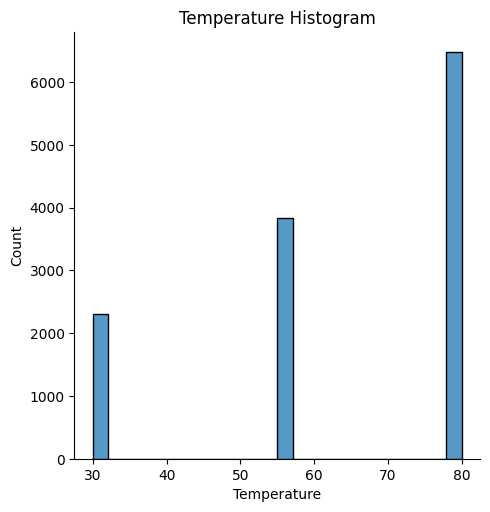

In [16]:
# generally, count data doesn't gain much insight from kde though
sns.displot(data['temperature'])
plt.xlabel('Temperature')
plt.title('Temperature Histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_coupon_data = data.query('coupon == "Bar"')
bar_coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [18]:
accepted_bar_coupon = bar_coupon_data['Y'].sum() / len(bar_coupon_data)
print(accepted_bar_coupon)

0.4099502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
unique_bar_values = bar_coupon_data['Bar'].unique()
print(unique_bar_values)

#Ranking: 'never' 'less1' '1~3' '4~8' 'gt8' -> interpret 1~3 as the "mean"

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [20]:
# how many null values here
nan_count = bar_coupon_data['Bar'].isnull().sum()
print(nan_count)

21


In [21]:
# replace nan vals
bar_coupon_data.loc[bar_coupon_data['Bar'].isnull(), 'Bar'] = '1~3'

In [22]:
# check if there are still nan values
nan_count = bar_coupon_data['Bar'].isnull().sum()
print(nan_count)

0


In [23]:
# Group data on those going to a bar > 3 times vs <= 3 times in a month
bar_coupon_data.loc[:, 'Bar_Group'] = bar_coupon_data['Bar'].apply(
    lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'more than 3'
)

# Sanity check
print(bar_coupon_data[['Bar', 'Bar_Group']].head(30))

       Bar    Bar_Group
9    never   3 or fewer
13   never   3 or fewer
17   never   3 or fewer
24   never   3 or fewer
35   never   3 or fewer
39   never   3 or fewer
46   never   3 or fewer
57   never   3 or fewer
61   never   3 or fewer
75   less1   3 or fewer
79   less1   3 or fewer
83   less1   3 or fewer
90     1~3   3 or fewer
101    1~3   3 or fewer
105    1~3   3 or fewer
112    1~3   3 or fewer
123    1~3   3 or fewer
127    1~3   3 or fewer
141  never   3 or fewer
145  never   3 or fewer
149  never   3 or fewer
156    gt8  more than 3
167    gt8  more than 3
171    gt8  more than 3
178  never   3 or fewer
189  never   3 or fewer
195  less1   3 or fewer
206  less1   3 or fewer
210  less1   3 or fewer
224    1~3   3 or fewer


<ipython-input-23-f0630e41226c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data.loc[:, 'Bar_Group'] = bar_coupon_data['Bar'].apply(


In [25]:
# those who went to a bar 3 or fewer times a month to those who went more.
bar_3_or_fewer_categories = ['never', 'less1', '1~3']

# Boolean series mean: https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html
# proportion of true values in the series (Y is 1/0 only anyways which map to true/false accepted or not)
accepted_3_or_fewer_visits = (bar_coupon_data['Y'][bar_coupon_data['Bar'].isin(bar_3_or_fewer_categories)] == 1).mean()
acceptBarCoupon_4_or_more = (bar_coupon_data['Y'][~bar_coupon_data['Bar'].isin(bar_3_or_fewer_categories)] == 1).mean()

print("Acceptance rate for those who went to a bar more than 3 times a month: {:.4f}".format(acceptBarCoupon_4_or_more))
print("As a percentage : {:.2%}".format(acceptBarCoupon_4_or_more))

print("Acceptance rate for those who went to a bar 3 or fewer times a month: {:.4f}".format(accepted_3_or_fewer_visits))
print("As a percentage : {:.2%}".format(accepted_3_or_fewer_visits))

Acceptance rate for those who went to a bar more than 3 times a month: 0.7688
As a percentage : 76.88%
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.3705
As a percentage : 37.05%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Check unique values

print(bar_coupon_data['Bar'].unique())

# bar > 1x a month -> NOT 'never', 'less 1'

['never' 'less1' '1~3' 'gt8' '4~8']


In [27]:
# "more than once a month" seems to have some overlap in the '1~3' category.
# less1 clearly is more than once. But for the '1~3' range, it's not clear if some are 1x or more than once. So, '1~3' is considered as more than once for this analysis
bar_more_than_1_categories  = ['1~3', 'gt8', '4~8']

In [28]:
#avid_bar_goer_over_25 = (bar_coupon_data['Bar'].isin(['4~8', 'gt8'])) & (bar_coupon_data['age'] > 25)

over_1_bar_age_over_25 = (bar_coupon_data['Y'][bar_coupon_data['Bar'].isin(bar_more_than_1_categories) & (bar_coupon_data['age'] > 25)] == 1).mean()

# Calculate acceptance rate for all others
all_others = (bar_coupon_data['Y'][~(bar_coupon_data['Bar'].isin(bar_more_than_1_categories) & (bar_coupon_data['age'] > 25))] == 1).mean()

print("Acceptance rate for Drivers > 25 who go to a bar > 1x a month: {:.2f}".format(over_1_bar_age_over_25))
print("As a percentage : {:.2%}".format(over_1_bar_age_over_25))

print("Acceptance rate for all others: {:.2f}".format(all_others))
print("As a percentage : {:.2%}".format(all_others))

Acceptance rate for Drivers > 25 who go to a bar > 1x a month: 0.68
As a percentage : 67.56%
Acceptance rate for all others: 0.33
As a percentage : 33.33%


Yes there's a difference. Drivers who were > 25 who went to a bar > 1x a month had almost a 2x higher acceptance coupon rate than all others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
bar_coupon_data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Group
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,3 or fewer
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,3 or fewer
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,3 or fewer
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,3 or fewer
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,3 or fewer


In [30]:
print(bar_coupon_data['passanger'].unique())

['Kid(s)' 'Alone' 'Friend(s)' 'Partner']


In [31]:
print(bar_coupon_data['occupation'].unique())

['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [32]:
# acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

bar_more_than_1_categories  = ['1~3', 'gt8', '4~8']

excluded_occupation = 'Farming Fishing & Forestry'

# Calculate acceptance rate for drivers going to bars more than once a month
# with passengers who are not kid(s) and are not in 'Farming Fishing & Forestry' occupation
avid_bar_goer_with_non_kid_passengers = ((bar_coupon_data['Y'][bar_coupon_data['Bar'].isin(bar_more_than_1_categories) & (bar_coupon_data['passanger'] != 'Kid(s)') &
        (bar_coupon_data['occupation'] != excluded_occupation)] == 1).mean())


# Calculate acceptance rate for all others
all_others = ((bar_coupon_data['Y'][~(bar_coupon_data['Bar'].isin(bar_more_than_1_categories) & (bar_coupon_data['passanger'] != 'Kid(s)') &
          (bar_coupon_data['occupation'] != excluded_occupation))] == 1).mean())


print("Acceptance Rate for > 1 time bar with Non-Kid Passengers and not Farming Fishing & Forestry occupation: {:.2f}".format(over_1_bar_age_over_25))
print("As a percentage: {:.2%}".format(over_1_bar_age_over_25))


print("Acceptance Rate for all others: {:.2f}".format(all_others))
print("As a percentage: {:.2%}".format(all_others))

Acceptance Rate for > 1 time bar with Non-Kid Passengers and not Farming Fishing & Forestry occupation: 0.68
As a percentage: 67.56%
Acceptance Rate for all others: 0.29
As a percentage: 29.42%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [33]:
print(bar_coupon_data['passanger'].unique())

['Kid(s)' 'Alone' 'Friend(s)' 'Partner']


In [34]:
print(bar_coupon_data['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [35]:
print(bar_coupon_data['age'].unique())

<IntegerArray>
[21, 46, 26, 31, 41, 29, 36]
Length: 7, dtype: Int64


In [36]:
print(bar_coupon_data['maritalStatus'].unique())

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [37]:
print(bar_coupon_data['RestaurantLessThan20'].unique())

['4~8' '1~3' 'less1' 'gt8' nan 'never']


In [38]:
# replace nan RestaurantLessThan20 entries with '1~3' as we have used "mean" as the standard "replacement" value elsewhere in this project
bar_coupon_data.loc[bar_coupon_data['RestaurantLessThan20'].isna(), 'RestaurantLessThan20'] =  '1~3'

# check replcement happened successfully
nan_count = bar_coupon_data['RestaurantLessThan20'].isna().sum()
print(nan_count)

0


In [39]:
print(bar_coupon_data['RestaurantLessThan20'].unique())

['4~8' '1~3' 'less1' 'gt8' 'never']


In [40]:
#  Less expensive restaurants (under $20) -> RestaurantLessThan20

Repeating Q here for ease of reference.

Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [41]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR

condition_1 = (bar_coupon_data['Bar'].isin(['4~8', 'gt8']) & (bar_coupon_data['passanger'] != 'Kid(s)') & (bar_coupon_data['maritalStatus'] != 'Widowed'))
acceptance_rate_condition_1 = (bar_coupon_data['Y'][condition_1] == 1).mean()


print("Acceptance Rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {:.2f}".format(acceptance_rate_condition_1))
print("As a percentage: {:.2%}".format(acceptance_rate_condition_1))

Acceptance Rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.77
As a percentage: 77.49%


In [42]:
# go to bars more than once a month and are under the age of 30

condition_2 = (bar_coupon_data['Bar'].isin(['4~8', 'gt8']) & (bar_coupon_data['age'] < 30))

acceptance_rate_condition_2 = (bar_coupon_data['Y'][condition_2] == 1).mean()

print("Acceptance Rate for those who go to bars more than once a month and are under the age of 30: {:.2f}".format(acceptance_rate_condition_2))
print("As a percentage: {:.2%}".format(acceptance_rate_condition_2))

Acceptance Rate for those who go to bars more than once a month and are under the age of 30: 0.80
As a percentage: 80.13%


In [43]:
print(bar_coupon_data['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [44]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.
# income bands: ['$37500 - $49999'  '$12500 - $24999'
#  '$25000 - $37499'
# 'Less than $12500']


condition_3 = ((bar_coupon_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupon_data['income'].isin(['$37500 - $49999', '$25000 - $37499','$12500 - $24999', 'Less than $12500'])))

acceptance_rate_condition_3 = (bar_coupon_data['Y'][condition_3] == 1).mean()

print("Acceptance Rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K: {:.2f}".format(acceptance_rate_condition_3))
print("As a percentage: {:.2%}".format(acceptance_rate_condition_3))

Acceptance Rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45
As a percentage: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, I would hypothesize the following about drivers who accepted the bar coupons:
- Younger individuals (those under 30) seemed more likely to accept bar coupons
- Those with lower incomes + went to cheap restaurants (economically "constrained" individuals) seemed less likely to accept coupons (budget awareness -> less likely to accept?)
- Those who have "less responsbility" like not being widowed and passengers that weren't kids were the most likely to accept coupons. Non-kid passengers may suggest that these individuals are more likely to do "fun" and social things.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
print(data['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [46]:
print(data['passanger'].unique())

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


# Coffee House coupons!

In [47]:
coffee_house_data = data.query('coupon == "Coffee House"')
coffee_house_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [48]:
print(coffee_house_data["CoffeeHouse"].unique())

['never' 'less1' '4~8' '1~3' 'gt8' nan]


In [49]:
# replace nan CoffeeHouse entries with '1~3' as we have used "mean" as the standard "replacement" value elsewhere in this project
coffee_house_data.loc[coffee_house_data['CoffeeHouse'].isna(), 'CoffeeHouse'] =  '1~3'
print(coffee_house_data["CoffeeHouse"].unique())

['never' 'less1' '4~8' '1~3' 'gt8']


In [50]:
# Strategy to determine the characteristics of passengers who accept Coffee House Coupons -> create new column that encompasses Coffee House Coupon AND accepted (1, otherwise 0)
coffee_house_data.loc[:, 'coffee_house_coupon_accepted'] = ((coffee_house_data['coupon'] == 'Coffee House') & (coffee_house_data['Y'] == 1)).astype(int)

coffee_house_data.head(5)

<ipython-input-50-dcae0575420e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_data.loc[:, 'coffee_house_coupon_accepted'] = ((coffee_house_data['coupon'] == 'Coffee House') & (coffee_house_data['Y'] == 1)).astype(int)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coffee_house_coupon_accepted
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,0


In [51]:
# Filter for accepted and rejected coupons
accepted = coffee_house_data[coffee_house_data['coffee_house_coupon_accepted'] == 1]
rejected = coffee_house_data[coffee_house_data['coffee_house_coupon_accepted'] == 0]

# Display counts or any other analysis
print(f"Accepted: {len(accepted)}, Rejected: {len(rejected)}")


Accepted: 1989, Rejected: 2000


In [52]:
passenger_distribution = coffee_house_data.groupby('coffee_house_coupon_accepted')['passanger'].value_counts()
print("\nPassenger Type Distribution:")
print(passenger_distribution)


Passenger Type Distribution:
coffee_house_coupon_accepted  passanger
0                             Alone        1267
                              Friend(s)     495
                              Partner       131
                              Kid(s)        107
1                             Alone         986
                              Friend(s)     731
                              Partner       173
                              Kid(s)         99
Name: count, dtype: int64


In [53]:
print(coffee_house_data['age'].unique())

<IntegerArray>
[21, 46, 26, 31, 41, 29, 36]
Length: 7, dtype: Int64


In [54]:
# group by coffee house coupon acceptance and passenger type and average age
age_distribution = coffee_house_data.groupby(['coffee_house_coupon_accepted', 'passanger'])['age'].mean().reset_index()

# Display the average age distribution
print("Average Age Distribution Based on Coupon Acceptance and Passenger Type:")
print(age_distribution)


Average Age Distribution Based on Coupon Acceptance and Passenger Type:
   coffee_house_coupon_accepted  passanger        age
0                             0      Alone  29.569061
1                             0  Friend(s)  29.571717
2                             0     Kid(s)  33.224299
3                             0    Partner  27.877863
4                             1      Alone  29.252535
5                             1  Friend(s)  29.235294
6                             1     Kid(s)  31.575758
7                             1    Partner  29.277457


In [55]:
# group by gender

age_distribution_gender = coffee_house_data.groupby(['coffee_house_coupon_accepted', 'passanger', 'gender'])['age'].mean().reset_index()

# Display the average age distribution
print("Average Age Distribution Based on Coupon Acceptance, Passenger Type, and Gender:")
print(age_distribution_gender)

Average Age Distribution Based on Coupon Acceptance, Passenger Type, and Gender:
    coffee_house_coupon_accepted  passanger  gender        age
0                              0      Alone  Female  29.951256
1                              0      Alone    Male  29.130508
2                              0  Friend(s)  Female  30.294118
3                              0  Friend(s)    Male  28.902724
4                              0     Kid(s)  Female  32.578125
5                              0     Kid(s)    Male  34.186047
6                              0    Partner  Female  29.209677
7                              0    Partner    Male  26.681159
8                              1      Alone  Female  29.542017
9                              1      Alone    Male  28.982353
10                             1  Friend(s)  Female  29.295812
11                             1  Friend(s)    Male  29.169054
12                             1     Kid(s)  Female  31.196721
13                             1     

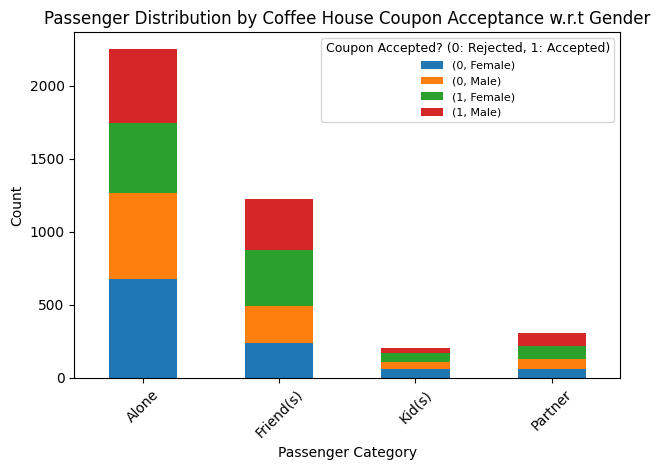

In [56]:
passenger_distribution = coffee_house_data.groupby(['coffee_house_coupon_accepted', 'passanger', 'gender']).size().reset_index(name='count')

# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
# https://pandas.pydata.org/docs/user_guide/reshaping.html

pivot_table = passenger_distribution.pivot_table(index='passanger', columns=['coffee_house_coupon_accepted', 'gender'], values='count')

pivot_table.plot(kind='bar', stacked=True)

plt.title('Passenger Distribution by Coffee House Coupon Acceptance w.r.t Gender')
plt.xlabel('Passenger Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title='Coupon Accepted? (0: Rejected, 1: Accepted)', loc='upper right', fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()

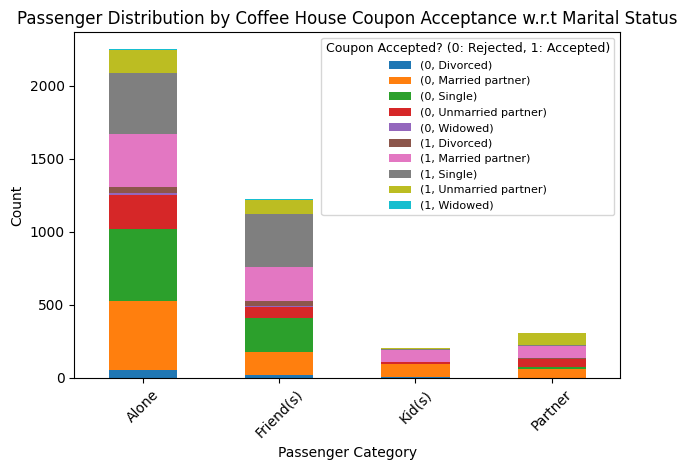

In [57]:
passenger_distribution = coffee_house_data.groupby(['coffee_house_coupon_accepted', 'passanger', 'maritalStatus']).size().reset_index(name='count')

# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
# https://pandas.pydata.org/docs/user_guide/reshaping.html

pivot_table = passenger_distribution.pivot_table(index='passanger', columns=['coffee_house_coupon_accepted', 'maritalStatus'], values='count')

pivot_table.plot(kind='bar', stacked=True)

plt.title('Passenger Distribution by Coffee House Coupon Acceptance w.r.t Marital Status')
plt.xlabel('Passenger Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title='Coupon Accepted? (0: Rejected, 1: Accepted)', loc='upper right', fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()

# Observations

W.R.T Gender: (Graph 1 of 2 above)

- The highest counts are those "Alone" in the passenger category
- More alone passengers rejected the coupon (both genders) compred to accepted
- Friend(s) passenger type were more likely to accept the coupon compared to reject
- The distribution of acceptance/rejection in the kid(s) passenger category was pretty even and very low
- The distribution of acceptance/rejection in the partner passenger category was also pretty even but a bit higher than kid(s) category.

W.R.T Marital Status: (Graph 2 of 2 above)
- The "Alone" passenger status has the largest counts with over 50% of all "alone" passenger rejecting the coffee house coupon
- Generally, across all passenger categories, married partner passengers tended to reject coffee house coupons equally often as they accepted
- Kid(s) passenger category is primarily dominated by married partners while parner passenger category is mainly comprised of married/unamrried partners.
- When with friend(s) passenger type, single people tended to accept the coupon more often.
